In [2]:
from tqdm import tqdm

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import pprint as pp
pp = pp.PrettyPrinter(indent=4)

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler

from utils import *

In [3]:
X, Y = load_data()
X = X/255.

(m, d) = X.shape
print(f'Input dimension:{d}, Total samples: {m}')

Input dimension:784, Total samples: 10000


[6]


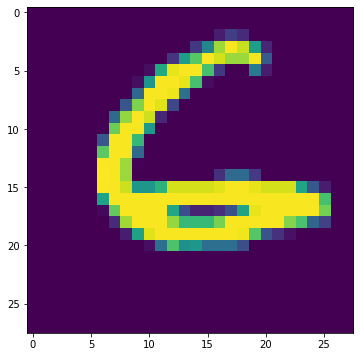

In [4]:
np.random.seed(99)

idx = np.random.randint(low=0, high=m)

plt.figure(figsize=(8,6))
plt.imshow(X[idx].reshape((28,28)));
print(Y[idx])

In [5]:
print(f'Proportion of classes in given dataset')
uniques, counts = np.unique(Y, return_counts=True)
percentages = dict(zip(uniques, counts * 100 / len(Y)))
pp.pprint(percentages)


Proportion of classes in given dataset
{   0: 9.76,
    1: 11.32,
    2: 9.48,
    3: 10.5,
    4: 9.72,
    5: 9.04,
    6: 10.08,
    7: 10.29,
    8: 9.72,
    9: 10.09}


In [6]:
devScores = []
testScores = []
seeds = [28, 42, 84, 128, 164, 256, 512, 999]

for seed in tqdm(seeds):
    X_dev, X_test, Y_dev, Y_test = train_test_split(X, Y, test_size=.2, shuffle=True, stratify=Y, random_state=seed)

    mle = MLEClassifier()
    mle.fit(X_dev, Y_dev)

    devScores.append(mle.score(X_dev, Y_dev))
    testScores.append(mle.score(X_test, Y_test))



100%|██████████| 8/8 [04:45<00:00, 35.66s/it]


In [7]:
print(f'\n\nAverage accuracy on dev set: {np.mean(np.array(devScores)):.3f}')
print(f'Average accuracy on test set: {np.mean(np.array(testScores)):.3f}')



Average accuracy on dev set: 0.961
Average accuracy on test set: 0.932


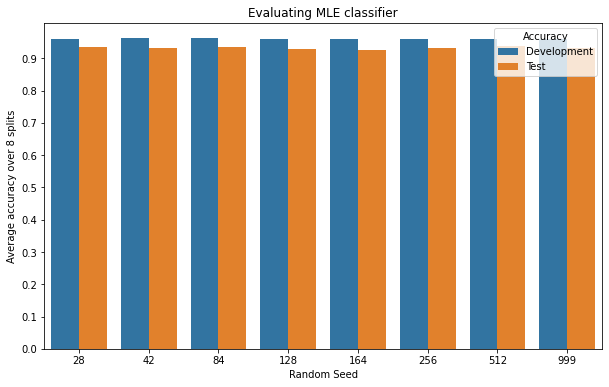

In [11]:
df = {'Random Seed':seeds+seeds, 
      'Score':devScores+testScores, 
      'Accuracy':['Development']*8 + ['Test']*8}

df = pd.DataFrame(df)

plt.figure(figsize=(10,6))

sns.barplot(data=df, x='Random Seed', y='Score', hue='Accuracy')
plt.xlabel('Random Seed')
plt.ylabel('Average accuracy over 8 splits')
plt.title('Evaluating MLE classifier')
plt.yticks([.1*i for i in range(10)])
plt.savefig('Evaluating_MLE_Classifer');

In [9]:
devScores

[0.959625, 0.961625, 0.962125, 0.95975, 0.960625, 0.96075, 0.960875, 0.959625]

In [10]:
testScores

[0.9335, 0.9305, 0.935, 0.9285, 0.926, 0.933, 0.9375, 0.9315]